# 객체탐지 실습

## 데이터셋 준비

In [1]:
!git clone https://github.com/Pseudo-Lab/Tutorial-Book-Utils

Cloning into 'Tutorial-Book-Utils'...
remote: Enumerating objects: 45, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 45 (delta 18), reused 17 (delta 5), pack-reused 0
Receiving objects: 100% (45/45), 11.62 KiB | 5.81 MiB/s, done.
Resolving deltas: 100% (18/18), done.


In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle datasets download -d andrewmvd/face-mask-detection

 98% 389M/398M [00:05<00:00, 44.2MB/s]
100% 398M/398M [00:05<00:00, 80.1MB/s]


In [9]:
!unzip -q /content/face-mask-detection.zip

In [12]:
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
from bs4 import BeautifulSoup

In [13]:
img_path = '/content/images'
label_path = '/content/annotations'

In [14]:
img_list = sorted(glob.glob(img_path+'/*'))
annot_list = sorted(glob.glob(label_path+'/*'))

In [15]:
print(len(img_list))
print(len(annot_list))

853
853


In [17]:
print(img_list[:10])
print(annot_list[:10])

['/content/images/maksssksksss0.png', '/content/images/maksssksksss1.png', '/content/images/maksssksksss10.png', '/content/images/maksssksksss100.png', '/content/images/maksssksksss101.png', '/content/images/maksssksksss102.png', '/content/images/maksssksksss103.png', '/content/images/maksssksksss104.png', '/content/images/maksssksksss105.png', '/content/images/maksssksksss106.png']
['/content/annotations/maksssksksss0.xml', '/content/annotations/maksssksksss1.xml', '/content/annotations/maksssksksss10.xml', '/content/annotations/maksssksksss100.xml', '/content/annotations/maksssksksss101.xml', '/content/annotations/maksssksksss102.xml', '/content/annotations/maksssksksss103.xml', '/content/annotations/maksssksksss104.xml', '/content/annotations/maksssksksss105.xml', '/content/annotations/maksssksksss106.xml']


## 바운딩 박스 함수 정의
 - generate_box 함수를 통해 xmin, ymin, xmax, ymax 값을 반환하도록 지정.
 - generate_label 함수는 마스크 착용 여부를 세단계로 나눠서 0, 1, 2 값을 반환.
 - with_mask의 경우 1을 mask_weared_incorrect의 경우 2를 나머지 경우의 수인 without_mask는 0을 반환
 - generate_target 함수는 generate_box와 generate_label를 각각 호출하여 반환된 값을 딕셔너리에 저장해 반환하는 함수
 - html.parser를 이용해 annotations 파일에 있는 내용들을 불러와 타겟의 바운딩 박스와 라벨을 추출
 - plot_image 함수는 이미지와 바운딩 박스를 함께 시각화 하는 함수.
 - 마스크 착용시 초록색, 마스크를 올바르게 착용 안했을 시 주황색, 마스크를 착용 안했을 시 빨간색 바운딩 박스 그리기

## 바운딩박스 시각화

In [18]:
## 바운딩 박스 시각화 함수 정의

def generate_box(obj):

    xmin = float(obj.find('xmin').text)
    ymin = float(obj.find('ymin').text)
    xmax = float(obj.find('xmax').text)
    ymax = float(obj.find('ymax').text)

    return [xmin, ymin, xmax, ymax]

def generate_label(obj):
    if obj.find('name').text == "with_mask":
        return 1
    elif obj.find('name').text == "mask_weared_incorrect":
        return 2
    return 0

def generate_target(file):
    with open(file) as f:
        data = f.read()
        soup = BeautifulSoup(data, "html.parser")
        objects = soup.find_all("object")

        num_objs = len(objects)

        boxes = []
        labels = []
        for i in objects:
            boxes.append(generate_box(i))
            labels.append(generate_label(i))

        target = {}
        target["boxes"] = boxes
        target["labels"] = labels

        return target

def plot_image(img_path, annotation):

    img = mpimg.imread(img_path)

    fig,ax = plt.subplots(1)
    ax.imshow(img)


    for idx in range(len(annotation["boxes"])):
        xmin, ymin, xmax, ymax = annotation["boxes"][idx]

        if annotation['labels'][idx] == 0 :
            rect = patches.Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),linewidth=1,edgecolor='r',facecolor='none')

        elif annotation['labels'][idx] == 1 :

            rect = patches.Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),linewidth=1,edgecolor='g',facecolor='none')

        else :

            rect = patches.Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),linewidth=1,edgecolor='orange',facecolor='none')

        ax.add_patch(rect)

    plt.show()

In [20]:
img_list.index(img_path+'/maksssksksss307.png')

232

## plot_image 함수를 통해 이미지 위에 바운딩 박스를 시각화
- generate_target 함수를 활용해 maksssksksss307.png 파일에 해당하는 바운딩 박스 정보를 bbox에 저장하고 plot_image 함수에 바운딩 박스 정보와 더불어 해당 이미지 파일 정보도 넘겨주어 시각화를 실시
- img_list[]와 annot_list[]안의 숫자는 maksssksksss307.png 파일의 위치를 뜻하므로 같은 숫자가 들어가 있음.

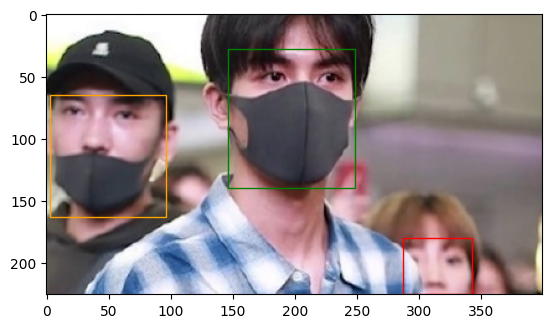

In [21]:
bbox = generate_target(annot_list[232])
plot_image(img_list[232], bbox)